

---


# Soccer Player Analytics: Unveiling Insights into Performance and Market Trends




---


## 1. Introduction and Motivation

Welcome to my soccer data analysis project! I've dived into the realm of football statistics, aiming to uncover intriguing insights within the data on players and their appearances. The dataset is a goldmine, covering player details like names, clubs, preferred foot, height, contract expiration dates, and an array of statistics such as market values, goals, assists, and disciplinary records.

This project is more than just numbers; it's a personal exploration driven by my passion for soccer, my favorite sport. Through this analysis, I intend to share compelling stories and unveil patterns that define the fascinating world of soccer.

As we delve into the data, the goal is to go beyond mere statistics and scores. This project is an exciting journey, and I'm eager to contribute meaningful insights to fellow soccer enthusiasts and analysts. So, let's kick off this exploration, unraveling the tales that make soccer a captivating and beloved sport.



---


## 2. Data Source and Description

The data utilized in this study was sourced from 'Transfermarkt,' a soccer statistics website. This platform provides a comprehensive range of soccer-related information, including scores, results, statistics, transfer news, and fixtures. Direct access link [here](https://www.kaggle.com/datasets/davidcariboo/player-scores/data).

For our analysis we will be using two tables which are players and appearances.



---


## 3. Entity Relationship Diagram
The relationship between the 'players' table and the 'appearances' table is denoted as optional-many meaning that a player may or may not have appearances but can have multiple appearances, the inverse relationship is denoted as mandatory-one meaning an appearance can only be linked to one player.

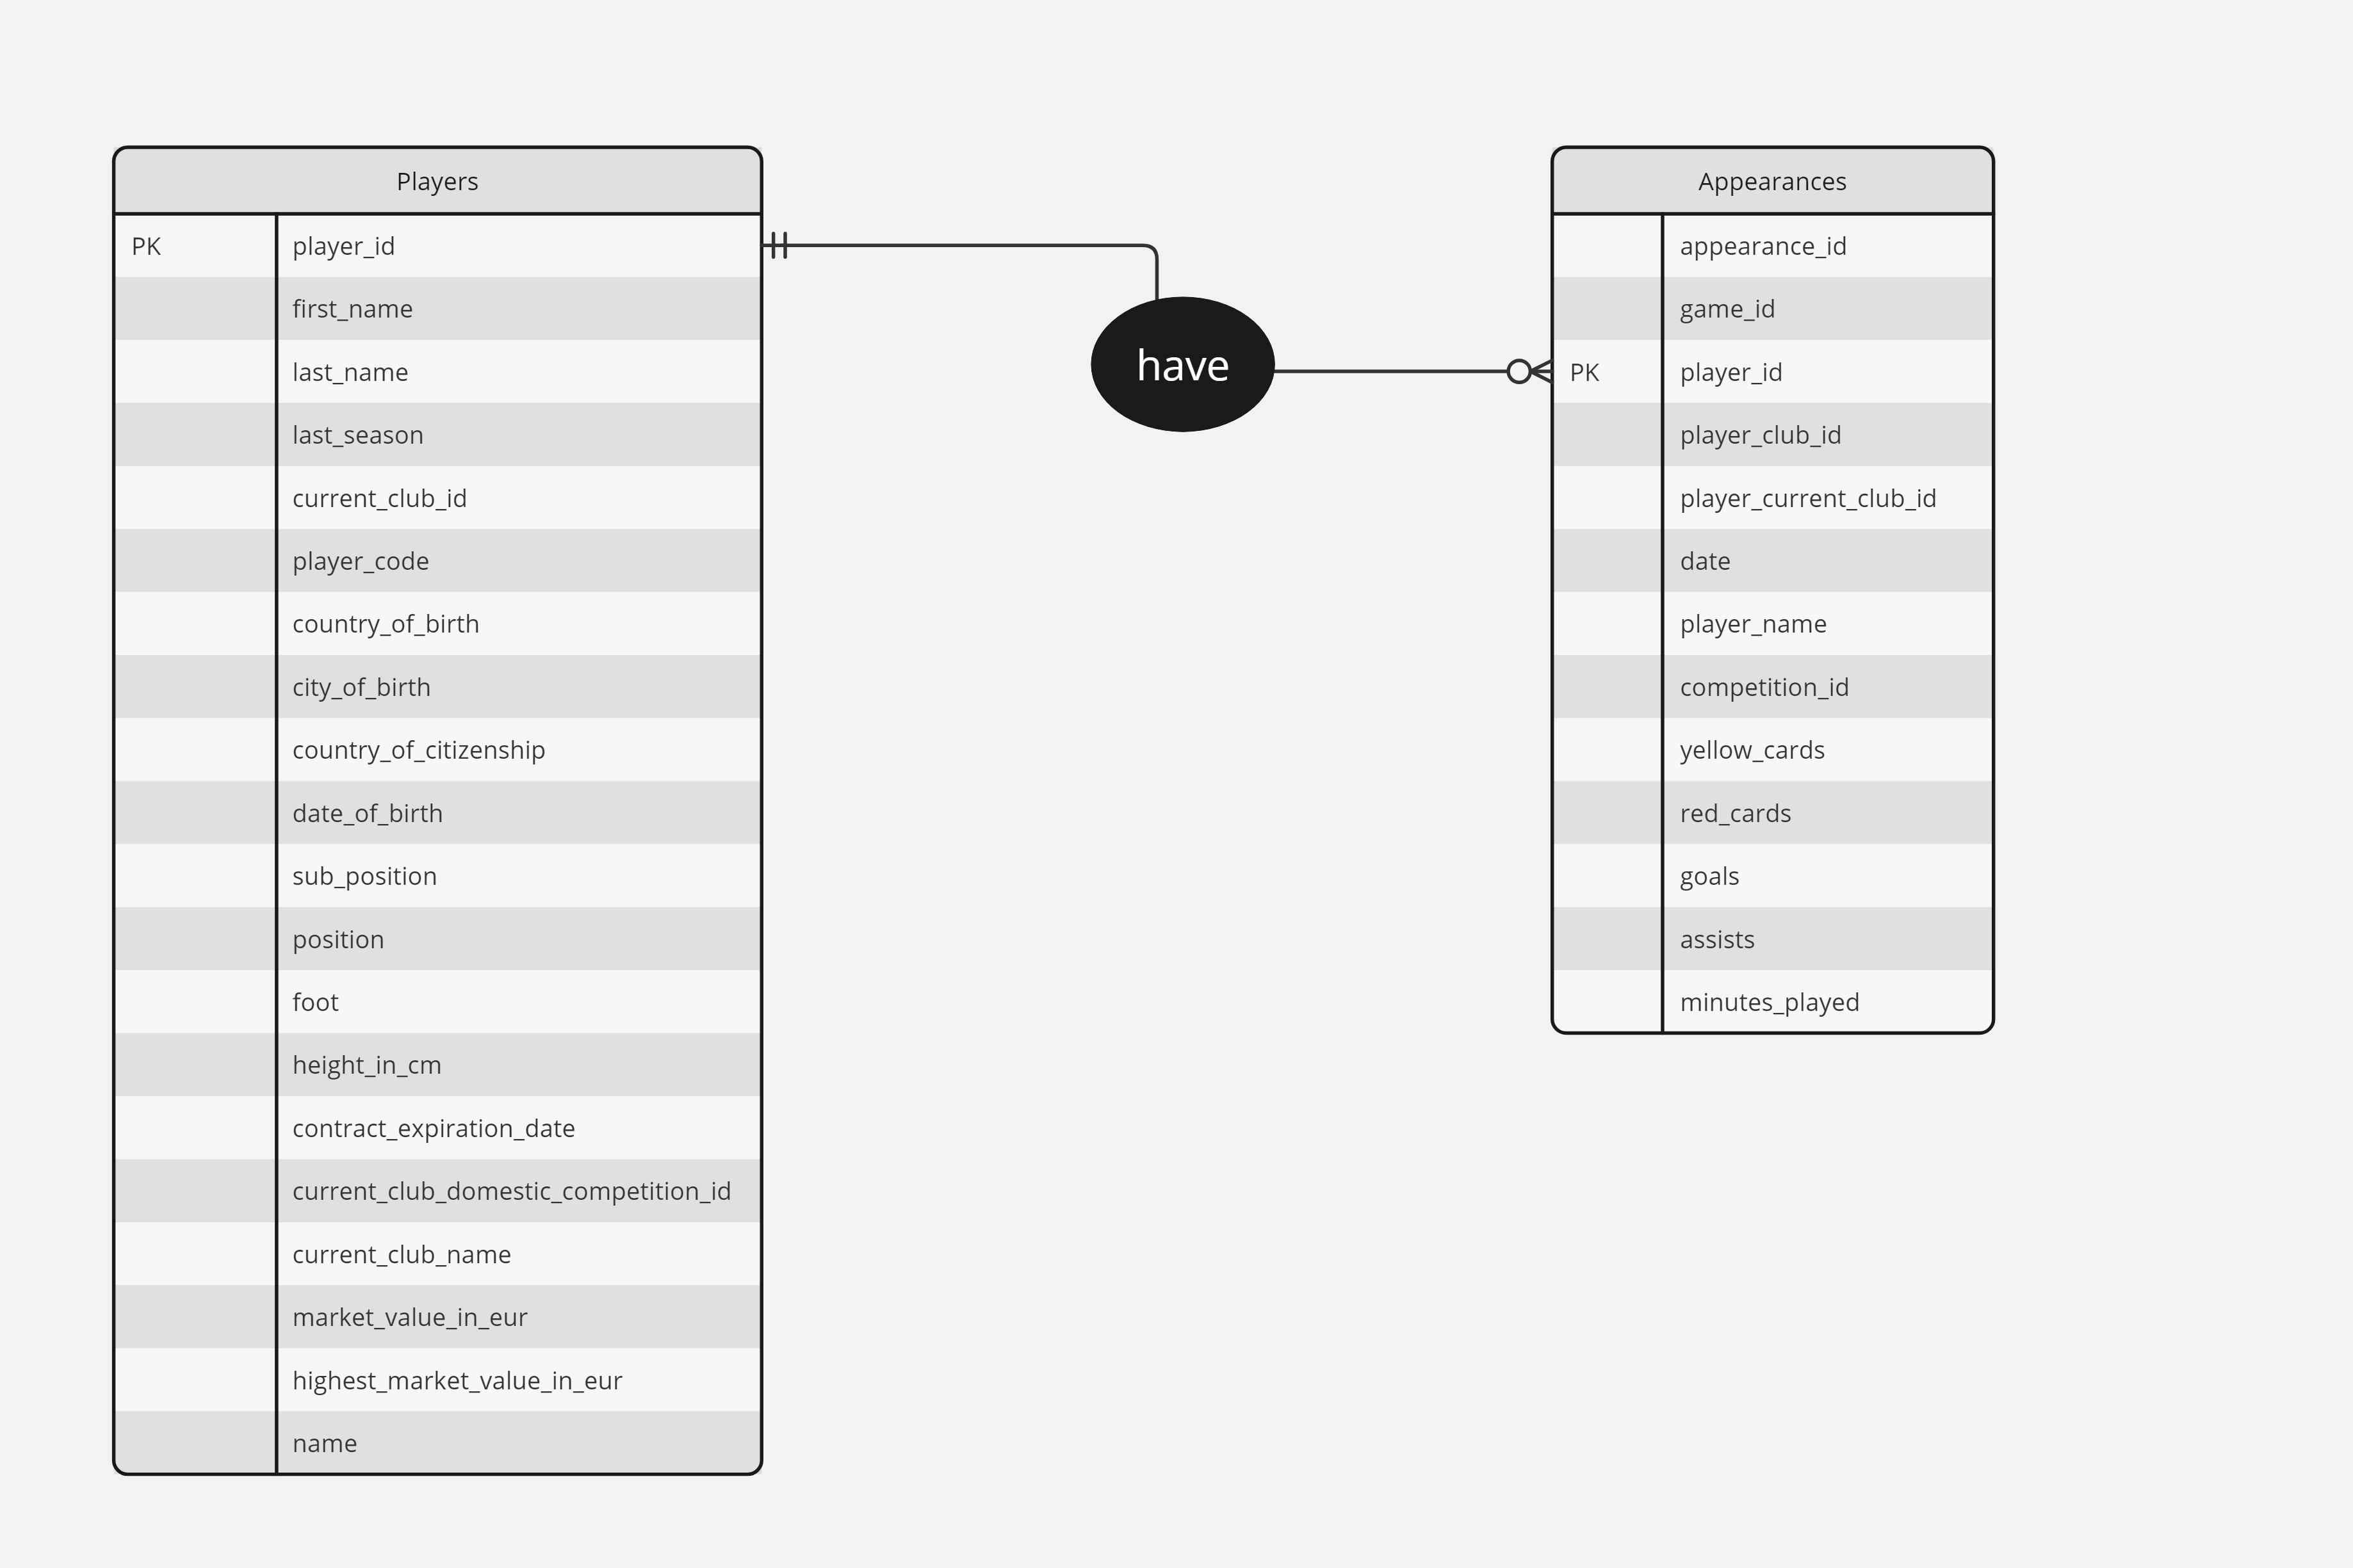




---


## 4. Exploratory Phase

---
### 4.1 Loading Data

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive')
data_folder = '/content/drive/MyDrive/Colab Notebooks/PersonalProject/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
players = pd.read_csv(data_folder+'players.csv', index_col=0)
appearances = pd.read_csv(data_folder+'appearances.csv', index_col=0)

In [137]:
players.head()

,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
player_id,,,,,,,,,,,,,,,,,,,,,
10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,1978-06-09,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,1980-08-06,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,1981-01-30,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,1978-05-08,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,1981-03-18,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0


In [138]:
appearances.head()

,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
appearance_id,,,,,,,,,,,,
2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90


---
### 4.2 Cleaning Data

In [139]:
# Let's check to see if our columns have any missing values
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30328 entries, 10 to 1186012
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   first_name                            28362 non-null  object 
 1   last_name                             30328 non-null  object 
 2   name                                  30328 non-null  object 
 3   last_season                           30328 non-null  int64  
 4   current_club_id                       30328 non-null  int64  
 5   player_code                           30328 non-null  object 
 6   country_of_birth                      27647 non-null  object 
 7   city_of_birth                         28135 non-null  object 
 8   country_of_citizenship                29783 non-null  object 
 9   date_of_birth                         30282 non-null  object 
 10  sub_position                          30156 non-null  object 
 11  position    

In [140]:
#Here we can see the percent of missing values for each column
players.isnull().mean() * 100

first_name                               6.482458
last_name                                0.000000
name                                     0.000000
last_season                              0.000000
current_club_id                          0.000000
player_code                              0.000000
country_of_birth                         8.840016
city_of_birth                            7.230942
country_of_citizenship                   1.797019
date_of_birth                            0.151675
sub_position                             0.567133
position                                 0.000000
foot                                     7.844236
height_in_cm                             6.874835
contract_expiration_date                37.730810
agent_name                              50.527565
image_url                                0.000000
url                                      0.000000
current_club_domestic_competition_id     0.000000
current_club_name                        0.000000


In [141]:
#Dropping agent_name column as it has more than 50% missing values
players = players.drop('agent_name', axis = 1)

In [142]:
# Dropping unnecessary columns
players = players.drop('image_url', axis = 1)

players = players.drop('url', axis = 1)

In [143]:
# Drop rows with null values in the 'first_name' column
players = players.dropna(subset=['first_name'])

# Drop rows with null values in the 'country_of_birth' column
players = players.dropna(subset=['country_of_birth'])

# Drop rows with null values in the 'city_of_birth' column
players = players.dropna(subset=['city_of_birth'])

# Drop rows with null values in the 'country_of_citizenship' column
players = players.dropna(subset=['country_of_citizenship'])

# Drop rows with null values in the 'date_of_birth' column
players = players.dropna(subset=['date_of_birth'])

# Drop rows with null values in the 'market_value_in_eur' column
players = players.dropna(subset=['market_value_in_eur'])

# Drop rows with null values in the 'highest_market_value_in_eur' column
players = players.dropna(subset=['highest_market_value_in_eur'])

In [144]:
# Imputing height of players with probability distribution
prob_distribution = players['height_in_cm'].value_counts(normalize=True)
players['height_in_cm'].fillna(np.random.choice(prob_distribution.index, p=prob_distribution.values),inplace=True)

In [145]:
# Convert 'date_of_birth' to datetime format
players['date_of_birth'] = pd.to_datetime(players['date_of_birth'])

# Calculate age based on the current year
current_year = datetime.now().year
players['age'] = current_year - players['date_of_birth'].dt.year

# Display the DataFrame with the new 'age' column
print(players[['date_of_birth', 'age']])

          date_of_birth  age
player_id                   
10           1978-06-09   46
26           1980-08-06   44
65           1981-01-30   43
80           1981-03-18   43
123          1980-11-05   44
...                 ...  ...
1160122      2005-04-12   19
1160405      2004-01-02   20
1162593      2005-05-06   19
1162979      2007-01-03   17
1163778      2002-06-13   22

[25143 rows x 2 columns]


In [146]:
players[players['contract_expiration_date'].isnull()]

,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,contract_expiration_date,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,age
player_id,,,,,,,,,,,,,,,,,,,,
10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,1978-06-09,Centre-Forward,Attack,right,184.0,NaN,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0,46
26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,1980-08-06,Goalkeeper,Goalkeeper,left,190.0,NaN,L1,Borussia Dortmund,750000.0,8000000.0,44
65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,1981-01-30,Centre-Forward,Attack,NaN,193.0,NaN,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0,43
80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,1981-03-18,Goalkeeper,Goalkeeper,right,194.0,NaN,L1,FC Bayern München,100000.0,3000000.0,43
123,Christoph,Metzelder,Christoph Metzelder,2012,33,christoph-metzelder,Germany,Haltern,Germany,1980-11-05,Centre-Back,Defender,NaN,193.0,NaN,L1,FC Schalke 04,1500000.0,9500000.0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039750,Luca,Foubert,Luca Foubert,2022,601,luca-foubert,Belgium,Kortrijk,Belgium,2004-04-25,Attacking Midfield,Midfield,left,184.0,NaN,BE1,Koninklijke Voetbalclub Kortrijk,50000.0,50000.0,20
1042580,Brian,Silva,Brian Silva,2022,12,brian-silva,France,Saint-Ouen,France,2003-06-02,Centre-Back,Defender,right,193.0,NaN,IT1,Associazione Sportiva Roma,75000.0,75000.0,21
1045972,Mario,Dorgeles,Mario Dorgeles,2023,2778,mario-dorgeles,Cote d'Ivoire,Andokoi,Cote d'Ivoire,2004-08-07,Central Midfield,Midfield,left,177.0,NaN,DK1,Fodbold Club Nordsjælland,350000.0,350000.0,20


In [147]:
# Filter rows with missing contract expiration dates and create a copy
players_with_missing_contract = players[players['contract_expiration_date'].isnull()].copy()

# Convert 'date_of_birth' to datetime format
players_with_missing_contract['date_of_birth'] = pd.to_datetime(players_with_missing_contract['date_of_birth'])

# Calculate age based on the current year
current_year = datetime.now().year
players_with_missing_contract['age'] = current_year - players_with_missing_contract['date_of_birth'].dt.year

# Calculate the average age
average_age = players_with_missing_contract['age'].mean()

# Display the result
print("Average Age of Players with Missing Contract Expiration Dates:", round(average_age))


Average Age of Players with Missing Contract Expiration Dates: 35


By examining the average age of players lacking contract expiration dates, we can infer that these individuals are likely nearing retirement or have already retired. Consequently, the absence of a contract expiration date is addressed by imputing the missing data. This imputation involves assigning the date of 30th June of the last season the player participated in, considering that this day commonly marks the end of the soccer season and serves as a typical contract expiration day in the sport.

In [148]:
# Calculate age based on the current year
current_year = pd.Timestamp.now().year
players['age'] = current_year - players['date_of_birth'].dt.year

# Filter players with missing contract expiration dates and age above 34
players_to_impute = players[(players['contract_expiration_date'].isnull())]

# Impute contract expiration date to 30th June of the year from 'last_season'
players_to_impute['contract_expiration_date'] = pd.to_datetime(players_to_impute['last_season'], format='%Y').dt.strftime('%Y-%m-30')

# Update the original DataFrame with the imputed values
players.update(players_to_impute)

<ipython-input-148-a2ae28366b62>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_to_impute['contract_expiration_date'] = pd.to_datetime(players_to_impute['last_season'], format='%Y').dt.strftime('%Y-%m-30')


In [149]:
# Imputing player's preferred foot by probabilistic imputation
prob_distribution = players['foot'].value_counts(normalize=True)
players['foot'].fillna(np.random.choice(prob_distribution.index, p=prob_distribution.values),inplace=True)

In [150]:
# Fill missing values in 'sub_position' with corresponding values from 'position' in the original DataFrame
players['sub_position'].fillna(players['position'], inplace=True)

# Display the modified DataFrame
print(players[['position', 'sub_position']])

             position      sub_position
player_id                              
10             Attack    Centre-Forward
26         Goalkeeper        Goalkeeper
65             Attack    Centre-Forward
80         Goalkeeper        Goalkeeper
123          Defender       Centre-Back
...               ...               ...
1160122      Defender         Left-Back
1160405    Goalkeeper        Goalkeeper
1162593      Midfield  Central Midfield
1162979      Midfield  Central Midfield
1163778        Attack    Centre-Forward

[25143 rows x 2 columns]


In [151]:
players.isnull().mean() * 100

first_name                              0.0
last_name                               0.0
name                                    0.0
last_season                             0.0
current_club_id                         0.0
player_code                             0.0
country_of_birth                        0.0
city_of_birth                           0.0
country_of_citizenship                  0.0
date_of_birth                           0.0
sub_position                            0.0
position                                0.0
foot                                    0.0
height_in_cm                            0.0
contract_expiration_date                0.0
current_club_domestic_competition_id    0.0
current_club_name                       0.0
market_value_in_eur                     0.0
highest_market_value_in_eur             0.0
age                                     0.0
dtype: float64

In [152]:
appearances.isnull().mean() * 100

game_id                   0.000000
player_id                 0.000000
player_club_id            0.000000
player_current_club_id    0.000000
date                      0.000000
player_name               0.021371
competition_id            0.000000
yellow_cards              0.000000
red_cards                 0.000000
goals                     0.000000
assists                   0.000000
minutes_played            0.000000
dtype: float64

In [153]:
appearances = appearances.dropna(subset=['player_name'])

In [154]:
appearances.isnull().mean() * 100

game_id                   0.0
player_id                 0.0
player_club_id            0.0
player_current_club_id    0.0
date                      0.0
player_name               0.0
competition_id            0.0
yellow_cards              0.0
red_cards                 0.0
goals                     0.0
assists                   0.0
minutes_played            0.0
dtype: float64

---
### 4.3 Analysis

---
#### 4.3.1 Descriptive Statistics of the 'Players' table

In [155]:
players.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,last_season,current_club_id,height_in_cm,market_value_in_eur,highest_market_value_in_eur,age
count,25143.00000,25143.00000,25143.00000,25143.00000,25143.00000,25143.00000
mean,2018.72131,4232.80157,182.80309,1619407.58859,3672677.08706,30.46816
std,3.67820,9842.06944,6.96374,6175451.59614,9283982.15938,6.30839
min,2012.00000,3.00000,18.00000,10000.00000,10000.00000,17.00000
25%,2016.00000,383.00000,178.00000,100000.00000,300000.00000,26.00000
50%,2019.00000,1038.00000,183.00000,250000.00000,800000.00000,30.00000
75%,2022.00000,2969.00000,188.00000,700000.00000,3000000.00000,35.00000
max,2023.00000,83678.00000,207.00000,180000000.00000,200000000.00000,54.00000


Analyzing the descriptive statistics of the players table reveals several insights. The average age of players in our dataset stands at around 30, with an average height of approximately 6 feet. Notably, the average market value of soccer players is 1.6 million euros. However, it's intriguing to observe a considerable standard deviation of 6.1 million euros for the same market values, indicating a notable degree of variability in player valuations.



---


####4.3.2 Descriptive Statistics of the 'Appearances' table

In [156]:
appearances.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,game_id,player_id,player_club_id,player_current_club_id,yellow_cards,red_cards,goals,assists,minutes_played
count,1515723.00000,1515723.00000,1515723.00000,1515723.00000,1515723.00000,1515723.00000,1515723.00000,1515723.00000,1515723.00000
mean,3021215.10801,181114.94798,2887.06413,3642.24390,0.14895,0.00382,0.09633,0.07431,69.62324
std,561825.41284,166408.50131,7137.35411,9317.57644,0.36748,0.06171,0.33178,0.28341,29.77194
min,2211607.00000,10.00000,1.00000,3.00000,0.00000,0.00000,0.00000,0.00000,1.00000
25%,2524759.00000,54231.00000,289.00000,336.00000,0.00000,0.00000,0.00000,0.00000,51.00000
50%,2921341.00000,127610.00000,855.00000,931.00000,0.00000,0.00000,0.00000,0.00000,90.00000
75%,3451086.00000,262609.00000,2441.00000,2687.00000,0.00000,0.00000,0.00000,0.00000,90.00000
max,4231133.00000,1186012.00000,83678.00000,83678.00000,2.00000,1.00000,6.00000,6.00000,120.00000


Examining the descriptive statistics of the appearances table reveals that the average minutes played per appearance is approximately 69 minutes. This duration aligns with the common practice in soccer, where substitutions are often made around the hour mark during a match.

---
#### 4.3.3 Merging tables for easier analysis

In [157]:
# Group by player_id and aggregate the metrics
player_stats = appearances.groupby('player_id').agg({
    'goals': 'sum',
    'assists': 'sum',
    'red_cards': 'sum',
    'yellow_cards': 'sum',
    'minutes_played': 'sum'
}).reset_index()

# Drop unnecessary columns
columns_to_drop = ['game_id', 'player_club_id', 'player_current_club_id', 'date', 'competition_id']
player_stats.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Display the new table
print(player_stats)


       player_id  goals  assists  red_cards  yellow_cards  minutes_played
0             10     48       24          0            19            8808
1             26      0        0          2             4           13508
2             65     38       13          1            11            8788
3             77      0        0          0             0             307
4             80      0        0          0             0            1080
...          ...    ...      ...        ...           ...             ...
23800    1160122      0        0          0             0              64
23801    1163778      1        1          0             1             493
23802    1166093      1        0          0             1             159
23803    1173042      0        0          0             0              20
23804    1186012      0        0          0             2             343

[23805 rows x 6 columns]


In [158]:
# Merge the two DataFrames based on 'player_id'
merged_data = pd.merge(players, player_stats, on='player_id', how='inner')

# Display the merged DataFrame
merged_data

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,age,goals,assists,red_cards,yellow_cards,minutes_played
0,10,Miroslav,Klose,Miroslav Klose,2015.0,398.0,miroslav-klose,Poland,Opole,Germany,...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0,46.0,48,24,0,19,8808
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017.0,16.0,roman-weidenfeller,Germany,Diez,Germany,...,L1,Borussia Dortmund,750000.0,8000000.0,44.0,0,0,2,4,13508
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015.0,1091.0,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0,43.0,38,13,1,11,8788
3,80,Tom,Starke,Tom Starke,2017.0,27.0,tom-starke,East Germany (GDR),Freital,Germany,...,L1,FC Bayern München,100000.0,3000000.0,43.0,0,0,0,0,1080
4,123,Christoph,Metzelder,Christoph Metzelder,2012.0,33.0,christoph-metzelder,Germany,Haltern,Germany,...,L1,FC Schalke 04,1500000.0,9500000.0,44.0,0,1,0,0,427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20514,1134218,Artem,Gusol,Artem Gusol,2023.0,48332.0,artem-gusol,Ukraine,"Boryspil, Kyiv Oblast",Ukraine,...,UKR1,FK Kolos Kovalivka,50000.0,50000.0,18.0,0,0,0,0,68
20515,1137664,Oumar,Diouf,Oumar Diouf,2023.0,126.0,oumar-diouf,Senegal,Dakar,Senegal,...,TR1,Çaykur Rizespor Kulübü,100000.0,100000.0,21.0,0,0,0,0,52
20516,1141628,Yunus Emre,Konak,Yunus Emre Konak,2023.0,2381.0,yunus-emre-konak,Turkey,Batman,Turkey,...,TR1,Sivasspor Kulübü,600000.0,600000.0,18.0,0,1,0,2,1182
20517,1160122,Lorenzo,Youndje,Lorenzo Youndje,2023.0,1245.0,lorenzo-youndje,Cameroon,Yaoundé,Belgium,...,BE1,Königliche Allgemeine Sportvereinigung Eupen,300000.0,300000.0,19.0,0,0,0,0,64


---
#### 4.3.4 Which nation boasts the highest number of players?

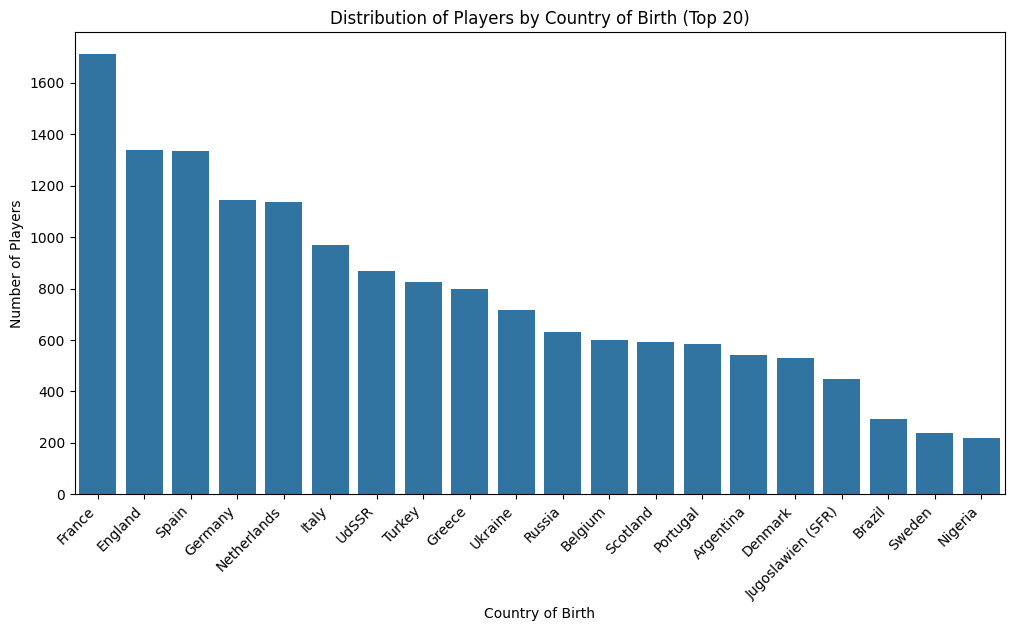

In [159]:
# Get the top 20 countries by the number of players
top_countries = merged_data['country_of_birth'].value_counts().head(20).index

# Filter the DataFrame for the top 20 countries
players_top_countries = merged_data[merged_data['country_of_birth'].isin(top_countries)]

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.countplot(x='country_of_birth', data=players_top_countries, order=top_countries)
plt.title('Distribution of Players by Country of Birth (Top 20)')
plt.xlabel('Country of Birth')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()


The visualization above illustrates that France has the highest number of players, closely followed by England, Spain, Germany, and the Netherlands. Notably, among the top 20 countries, only four are non-European, underscoring the prevalent dominance of Europe in the realm of soccer.

---
#### 4.3.5 What is the distribution of age within players?

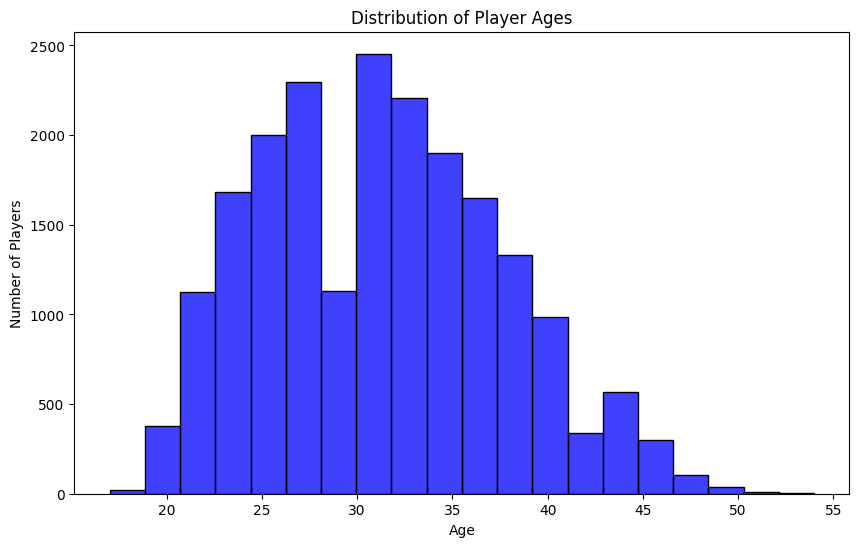

In [160]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['age'], bins=20, kde=False, color='blue')
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Number of Players')

# Show the plot
plt.show()


The bar chart indicates a concentration of players around the ages of 27, 31, and 32. These age groups, along with the surrounding ones, are widely acknowledged as the peak years for a soccer player. It is during this phase that players typically exhibit their highest market value and peak performance levels.

---
#### 4.3.6 What is the distribution of positions amongst players?

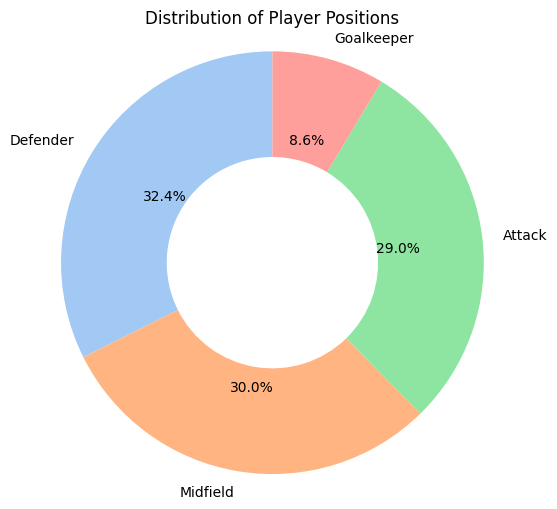

In [161]:
# Exclude rows with the position 'Missing'
players_filtered = merged_data[merged_data['position'] != 'Missing']

# Count the number of players for each position
position_counts = players_filtered['position'].value_counts()

# Create a smaller and thicker donut chart
plt.figure(figsize=(6, 6))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5), colors=sns.color_palette('pastel'))
plt.gca().add_artist(plt.Circle((0, 0), 0.4, fc='white'))  # Adjust the size of the white circle

# Set aspect ratio to be equal for a circular chart
plt.axis('equal')

plt.title('Distribution of Player Positions')
plt.show()


According to the donut chart, the position with the lowest number of players is Goalkeeper. This observation aligns with logical expectations, considering that a team typically has only one goalkeeper on the field at a time, whereas there can be multiple midfielders, attackers, and defenders in a team lineup.

---
#### 4.3.7 What is the distribution of ages among soccer players with market values exceeding 25 million, 50 million, and 100 million euros, and are there any noticeable trends or patterns in the age demographics of high-value players?

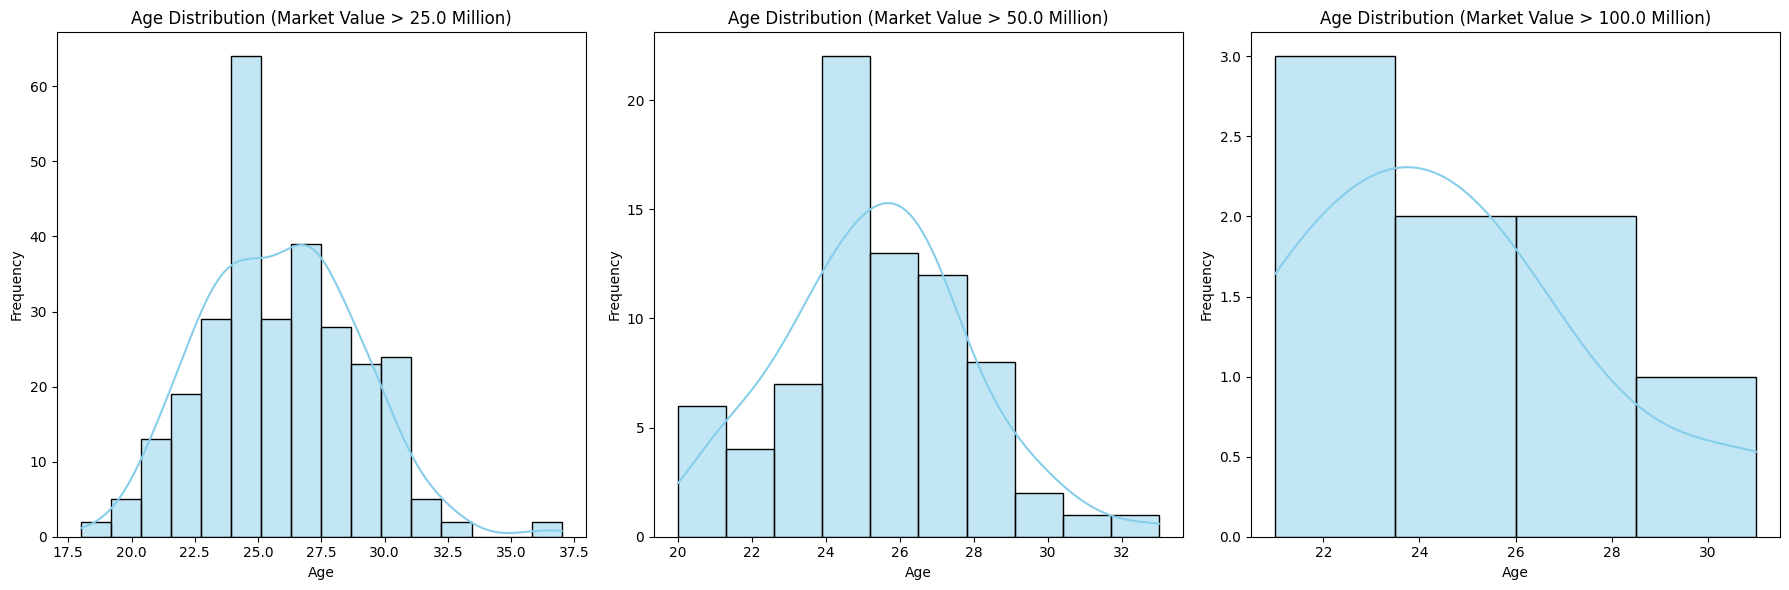

In [162]:
# Define market value thresholds
thresholds = [25_000_000, 50_000_000, 100_000_000]

# Create subplots with individual y-axis scales
fig, axes = plt.subplots(nrows=1, ncols=len(thresholds), figsize=(18, 6), sharey=False)

# Plot histograms for each threshold
for i, threshold in enumerate(thresholds):
    # Filter players with market value higher than the threshold
    high_value_players = merged_data[merged_data['market_value_in_eur'] > threshold]

    # Create a histogram of the age distribution
    sns.histplot(high_value_players['age'], kde=True, color='skyblue', edgecolor='black', ax=axes[i])

    axes[i].set_title(f'Age Distribution (Market Value > {threshold/1e6} Million)')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


The histograms reveal intriguing insights into the age distribution of soccer players based on different market value thresholds. For players with market values exceeding 25 million euros, the most common age is around 23-24. However, as we move to even more valuable players, those with market values exceeding 50 million euros, the most common age shifts to 25. Interestingly, for players valued over 100 million euros, the most common age is 22.

This trend suggests a noteworthy aspect of modern football where teams increasingly prioritize the potential of players over their current performances. Consequently, young players with high potential emerge as the most valuable assets in soccer, explaining the prevalence of younger ages among players with extremely high market values.

---
#### 4.3.8 can the above theory get stronger by looking at the minutes played instead of age?

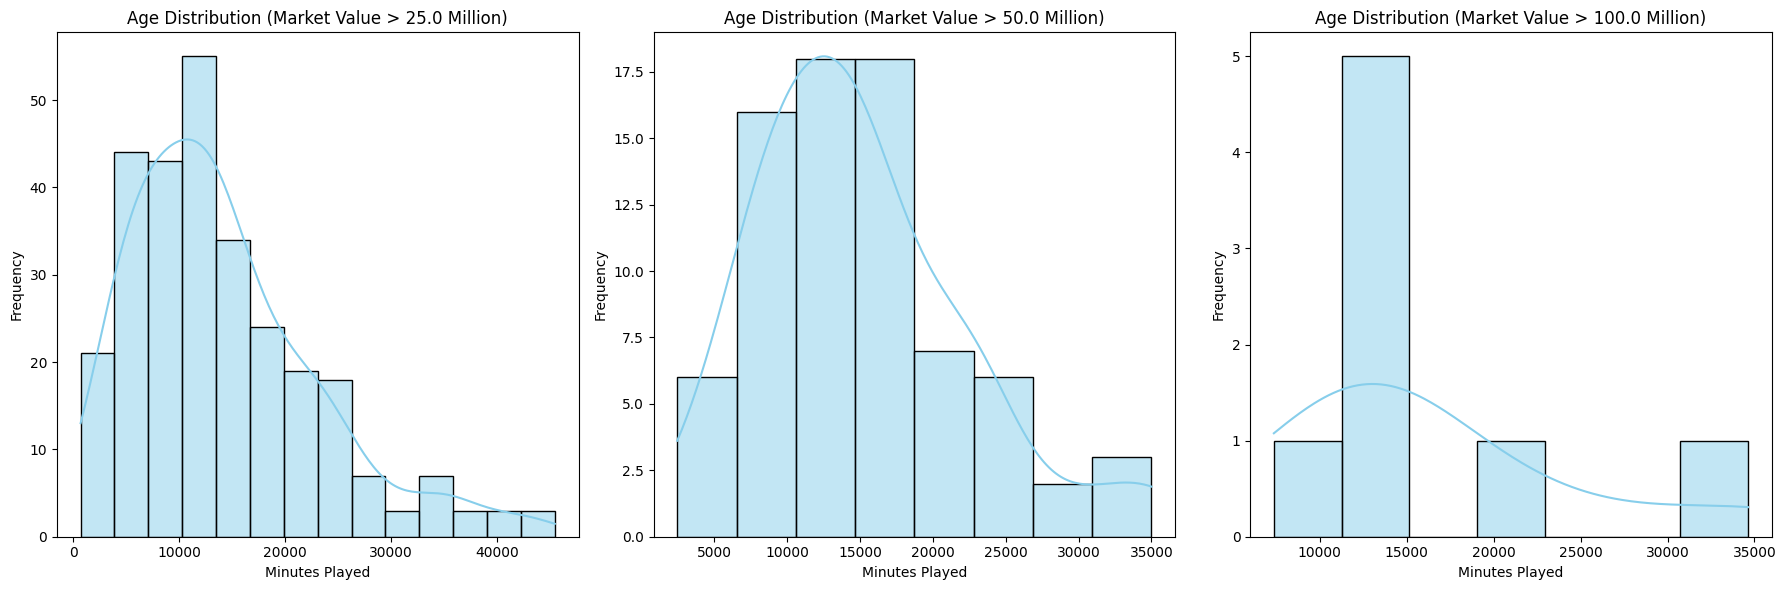

In [163]:
# Define market value thresholds
thresholds = [25_000_000, 50_000_000, 100_000_000]

# Create subplots with individual y-axis scales
fig, axes = plt.subplots(nrows=1, ncols=len(thresholds), figsize=(18, 6), sharey=False)

# Plot histograms for each threshold
for i, threshold in enumerate(thresholds):
    # Filter players with market value higher than the threshold
    high_value_players = merged_data[merged_data['market_value_in_eur'] > threshold]

    # Create a histogram of the age distribution
    sns.histplot(high_value_players['minutes_played'], kde=True, color='skyblue', edgecolor='black', ax=axes[i])

    axes[i].set_title(f'Age Distribution (Market Value > {threshold/1e6} Million)')
    axes[i].set_xlabel('Minutes Played')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


Observing the data, players valued above 25 million euros have accumulated just over 10,000 minutes in their careers, equivalent to approximately 110 full matches. For those valued over 50 million euros, the playtime increases to a range of 15,000 to 20,000 minutes, translating to 160-210 matches. Interestingly, the older trend is not replicated among players valued over 100 million euros, where the accumulated minutes hover around 15,000. This deviation could be attributed to the fact that players with exceptional potential often start their professional football careers at a very early age, around 18-19, accumulating more playing minutes than the average footballer.

---
#### 4.3.9 What is the discipinary record of players across different leagues.

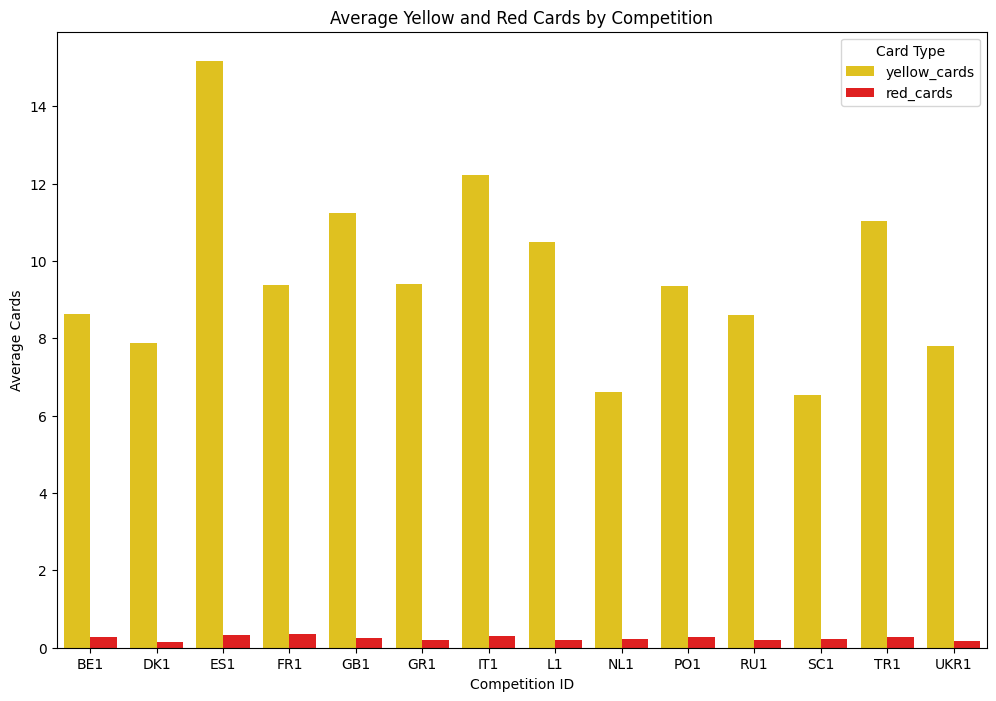

In [164]:
# Group by 'current_club_domestic_competition_id' and calculate the average yellow and red cards
avg_cards_by_competition = merged_data.groupby('current_club_domestic_competition_id').agg({
    'yellow_cards': 'mean',
    'red_cards': 'mean'
}).reset_index()

# Melt the DataFrame for easier plotting
melted_avg_cards = pd.melt(avg_cards_by_competition, id_vars='current_club_domestic_competition_id', var_name='Card Type', value_name='Average Cards')

# Define custom colors for yellow and red cards
custom_colors = {'yellow_cards': 'gold', 'red_cards': 'red'}

# Create a stacked bar chart with custom colors
plt.figure(figsize=(12, 8))
sns.barplot(
    x='current_club_domestic_competition_id',
    y='Average Cards',
    hue='Card Type',
    data=melted_avg_cards,
    palette=custom_colors
)
plt.title('Average Yellow and Red Cards by Competition')
plt.xlabel('Competition ID')
plt.ylabel('Average Cards')
plt.legend(title='Card Type', loc='upper right')

# Show the plot
plt.show()


The visualization highlights that players in the Spanish league, La Liga, have the highest average yellow cards, followed by Italy's Serie A and then England's Premier League. A plausible explanation for this trend could be the strict officiating in the Spanish and Italian leagues, leading to a faster accumulation of yellow cards by players. It's intriguing to note England's position as the third-highest, considering the country's historical reputation for a robust style of soccer where yellow cards are not easily shown.

However, recent efforts in the English Premier League to curb rough play and reduce injuries might be influencing this shift. This suggests a changing dynamic in English soccer, reflecting a balance between maintaining a competitive edge and ensuring player safety.

---
#### 4.3.10 Which league's players are most valuable?

<ipython-input-165-356b419d6fb7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='current_club_domestic_competition_id', y='market_value_in_eur', data=avg_market_value_by_league, palette='Set1')


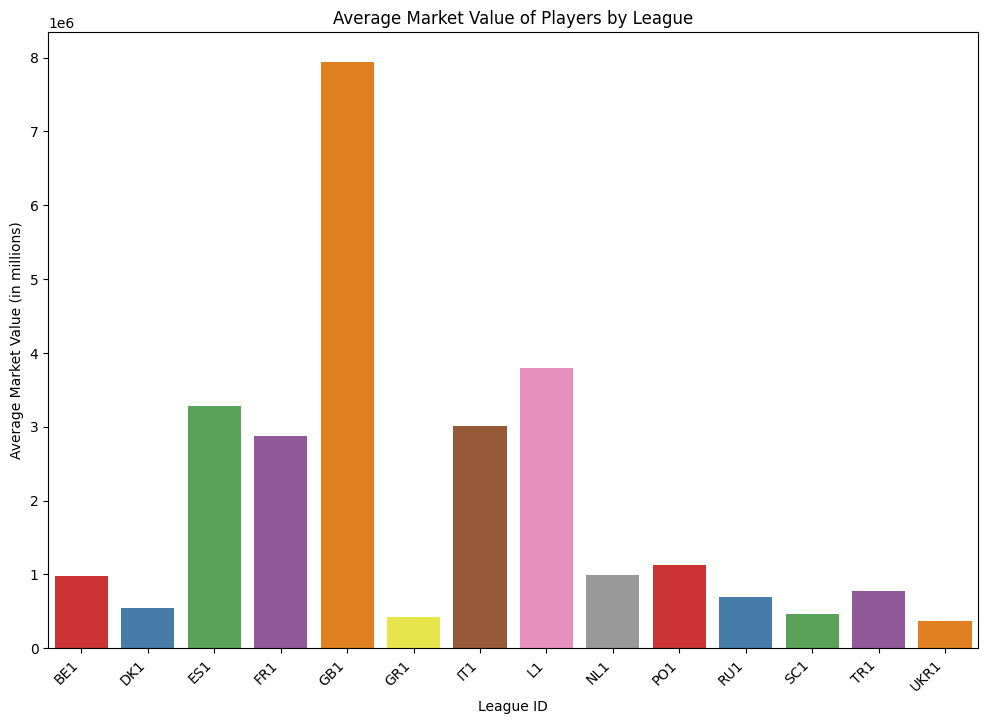

In [165]:
# Group by 'current_club_domestic_competition_id' and calculate the average market value
avg_market_value_by_league = merged_data.groupby('current_club_domestic_competition_id')['market_value_in_eur'].mean().reset_index()

# Create a dark colormap
dark_cmap = sns.dark_palette('#69d', as_cmap=True)

# Create a bar plot with a distinct dark color for each bar
plt.figure(figsize=(12, 8))
sns.barplot(x='current_club_domestic_competition_id', y='market_value_in_eur', data=avg_market_value_by_league, palette='Set1')
plt.title('Average Market Value of Players by League')
plt.xlabel('League ID')
plt.ylabel('Average Market Value (in millions)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()


Based on the presented visualization, it's evident that players in the English Premier League command the highest average market value, with a significant gap between England and the French League. Several factors contribute to this notable discrepancy.

Foremost, the English Premier League stands out as the wealthiest soccer league globally, attracting the highest viewership and following. The league's teams are financially robust, largely owing to substantial revenues generated from TV broadcasting deals. Notably, the equitable distribution of this revenue among all league teams sets the Premier League apart from many others, where top teams often receive a disproportionate share. This financial advantage enables English teams to have more significant resources for player acquisitions, resulting in a rapid rise in player values in recent years.

The French League's second position in average player market value can be attributed to the emergence of promising youth players. France boasts some of the best young talents globally, many of whom play in the French League. The country's success, highlighted by winning the 2018 World Cup and reaching the 2022 World Cup final against Argentina, further elevates the market value of players within the French League.

---
#### 4.3.11 Which team boasts the highest cumulative market value in their squad?

<ipython-input-166-98a72957e29a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='market_value_in_eur', y='current_club_name', data=top_15_clubs, palette='viridis')


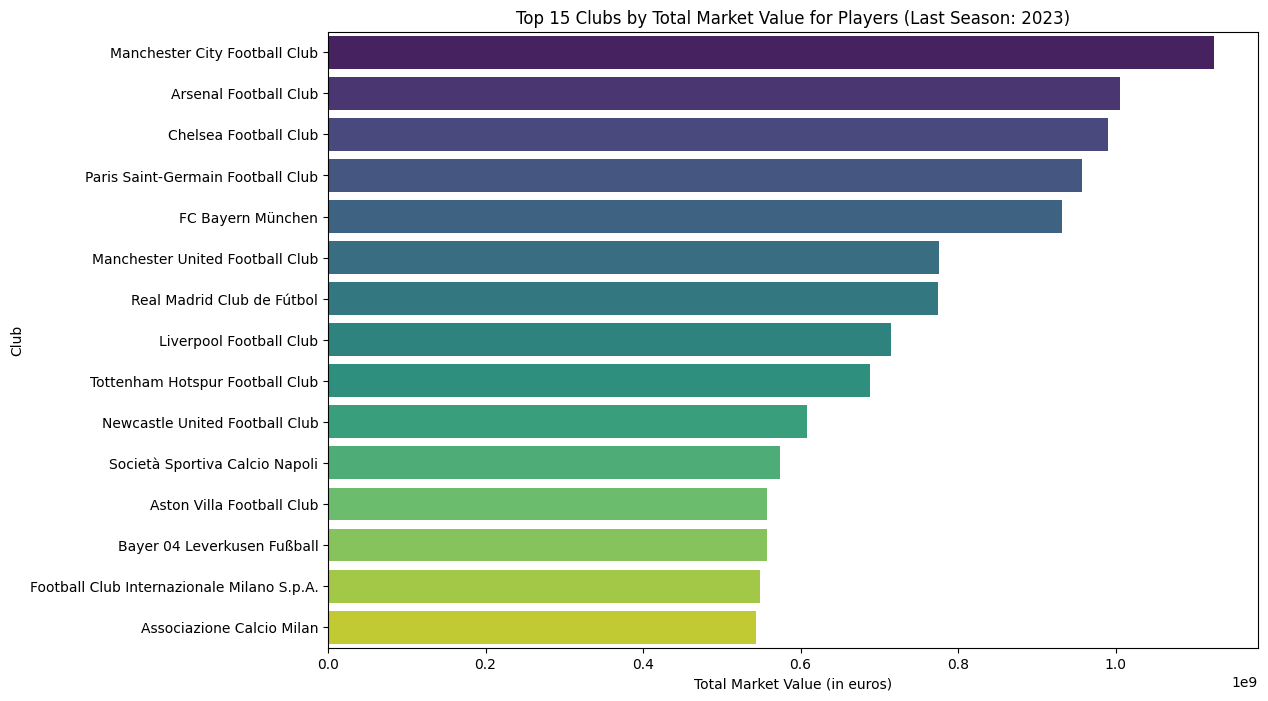

In [166]:
# Filter players for the last season (2023)
players_2023 = players[players['last_season'] == 2023]

# Group by current club and calculate the total market value for each club
total_market_value_by_club = players_2023.groupby('current_club_name')['market_value_in_eur'].sum().reset_index()

# Sort the DataFrame by total market value in descending order
total_market_value_by_club = total_market_value_by_club.sort_values(by='market_value_in_eur', ascending=False)

# Select only the top 15 clubs
top_15_clubs = total_market_value_by_club.head(15)

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='market_value_in_eur', y='current_club_name', data=top_15_clubs, palette='viridis')
plt.title('Top 15 Clubs by Total Market Value for Players (Last Season: 2023)')
plt.xlabel('Total Market Value (in euros)')
plt.ylabel('Club')
plt.show()


The presented visualization indicates that Manchester City's squad holds the distinction of being the most valuable in the world. Following a season where they achieved a remarkable treble, it comes as no surprise that their players are highly valued. Notably, Arsenal closely follows, securing the second spot with a squad that performed exceptionally well, finishing second in the league. The high squad value for Arsenal can be attributed, in part, to their relatively young squad, averaging around 25 years.

Claiming the third position is Chelsea, despite finishing 12th in the league the previous season. A recent change in ownership has prompted significant investment, with approximately 1 billion Euros spent on players over the last year, signaling a concerted effort to quickly regain competitiveness.

It's noteworthy that among the top 10 most valuable squads, seven hail from the English Premier League. This underscores the financial strength of teams in the league, emphasizing their dominance in terms of squad valuation on the global stage.

---
#### 4.3.12 What is the average age of players in the most valuable soccer squads?

<ipython-input-167-fa2f7c962c93>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='current_club_name', data=average_age_top_15_clubs, order=top_15_clubs['current_club_name'], palette='plasma')


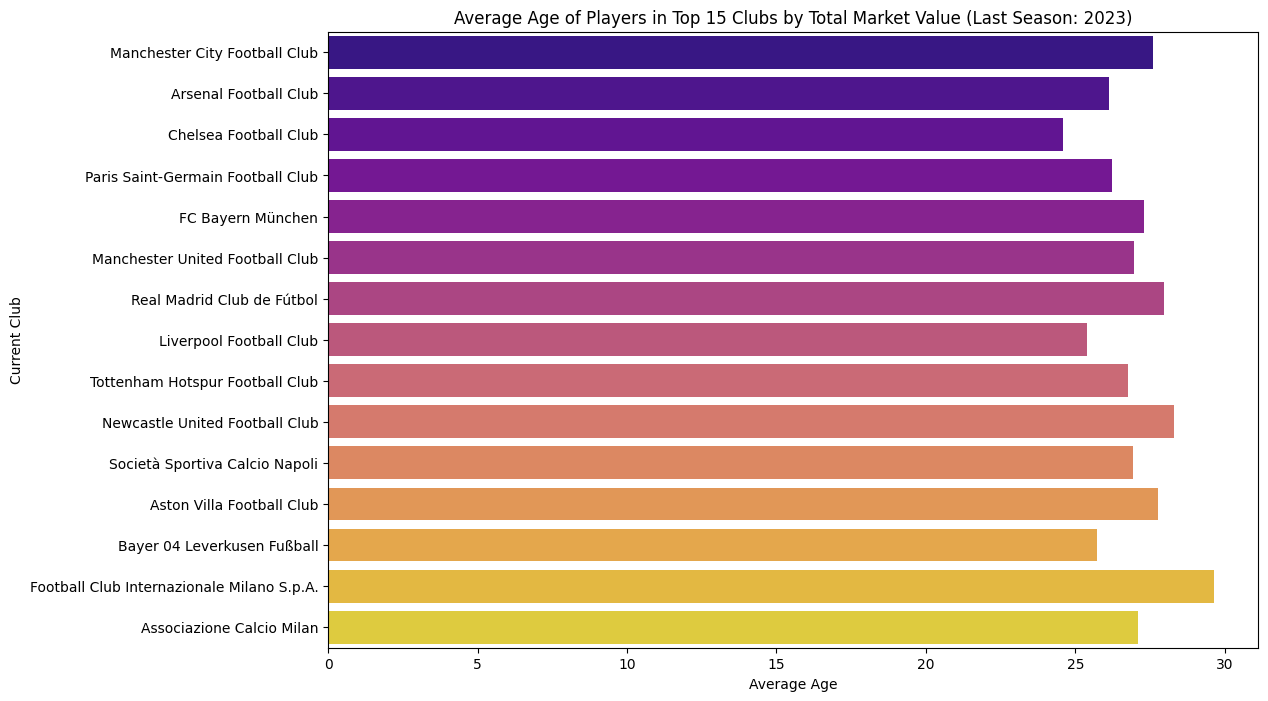

In [167]:
# Filter players for the last season (2023)
players_2023 = players[players['last_season'] == 2023]

# Group by current club and calculate the total market value for each club
total_market_value_by_club = players_2023.groupby('current_club_name')['market_value_in_eur'].sum().reset_index()

# Sort the DataFrame by total market value in descending order
total_market_value_by_club = total_market_value_by_club.sort_values(by='market_value_in_eur', ascending=False)

# Select only the top 15 clubs
top_15_clubs = total_market_value_by_club.head(15)

# Filter players for the top 15 clubs
players_top_15_clubs = players_2023[players_2023['current_club_name'].isin(top_15_clubs['current_club_name'])]

# Calculate the average age for players in the top 15 clubs
average_age_top_15_clubs = players_top_15_clubs.groupby('current_club_name')['age'].mean().reset_index()

# Create a bar chart with the order of clubs from the highest market value chart
plt.figure(figsize=(12, 8))
sns.barplot(x='age', y='current_club_name', data=average_age_top_15_clubs, order=top_15_clubs['current_club_name'], palette='plasma')
plt.title('Average Age of Players in Top 15 Clubs by Total Market Value (Last Season: 2023)')
plt.xlabel('Average Age')
plt.ylabel('Current Club')
plt.show()

The visualization indicates that Chelsea's squad stands out as the youngest among the most valuable squads globally. This aligns with the strategic approach of the new ownership at Chelsea over the past year, emphasizing the acquisition of the best young talent worldwide to revamp the team. Notably, this youth-centric philosophy has positioned Chelsea's squad as the youngest among the top-tier teams.

Following closely is Bayer Leverkusen, whose squad is the second youngest among the most valuable. The recent appointment of Xabi Alonso as the club's manager, known for his youthful approach, has played a significant role. Leverkusen, under Alonso's management, has built a team comprising young and exciting players, currently leading the German League standings.

---
## 5. Challenges

One notable challenge in this analysis was the absence of historical data for player market values. This limitation restricted the ability to delve deeper into trends and patterns related to the market values of players over time.

Additionally, the lack of comprehensive data on defensive actions and other gameplay metrics such as passing, through balls, and long balls posed a hindrance in constructing an effective Machine Learning model for predicting player market values. The absence of detailed gameplay statistics limited the scope of feature variables essential for training a robust predictive model.

---
## 6. Conclusion

In conclusion, this soccer data analysis project has provided valuable insights into various aspects of the football world, ranging from player statistics and market values to league dynamics and squad evaluations. The exploration of datasets from the 'Transfermarkt' platform has allowed us to uncover patterns, trends, and intriguing correlations within the soccer landscape.

We began by delving into player details such as age, height, preferred foot, and market values, gaining a comprehensive understanding of the diverse attributes that contribute to a player's profile. Descriptive statistics provided a snapshot of the average age, height, and market values, revealing both common trends and notable variations among players.

League-wise analyses shed light on the dominance of European nations in terms of player representation, with England, France, and Spain emerging as prominent hubs for soccer talent. The examination of yellow card frequencies highlighted intriguing trends in officiating styles across different leagues.

The evaluation of squad values showcased the financial might of English Premier League teams, with Manchester City leading the pack. Chelsea's recent surge in squad value, despite a lower league finish, exemplifies the transformative impact of strategic ownership changes.

Challenges faced during the analysis, such as the lack of historical market value data and detailed gameplay metrics, provided insights into potential areas for improvement in future analyses.

Looking ahead, the project could benefit from the incorporation of machine learning models to predict player market values. With the availability of historical data and additional gameplay statistics, the project could develop predictive models to forecast how a player's market value might evolve over time. This could be a valuable tool for clubs, analysts, and enthusiasts to anticipate player worth based on performance metrics, age, and other relevant factors.

Furthermore, expanding the analysis to include more advanced statistics, such as defensive actions, passing accuracy, and goal contributions, would offer a more comprehensive view of a player's overall performance. Integrating these factors into predictive models could enhance the accuracy and effectiveness of market value predictions.

In conclusion, the project has laid a foundation for deeper explorations into the intricate world of soccer analytics. The integration of machine learning and the inclusion of more comprehensive datasets could further elevate the project's capability to offer valuable insights and predictions in the dynamic and ever-evolving realm of football.

---
## 7. References
1. “Football Transfers, Rumours, Market Values and News.” Transfermarkt, www.transfermarkt.com/. Accessed 5 Jan. 2024.

---